<h2>Activation Function choose
<h4>Vector regression => many output nodes
<h4>Multi class classification => softmax output
<h4>Non exclusive tags => many sigmoid output nodes

<h1>Multi class classification

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/drive/My Drive/Google Colab/Neural Network/Keras/My_Code_Keras/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


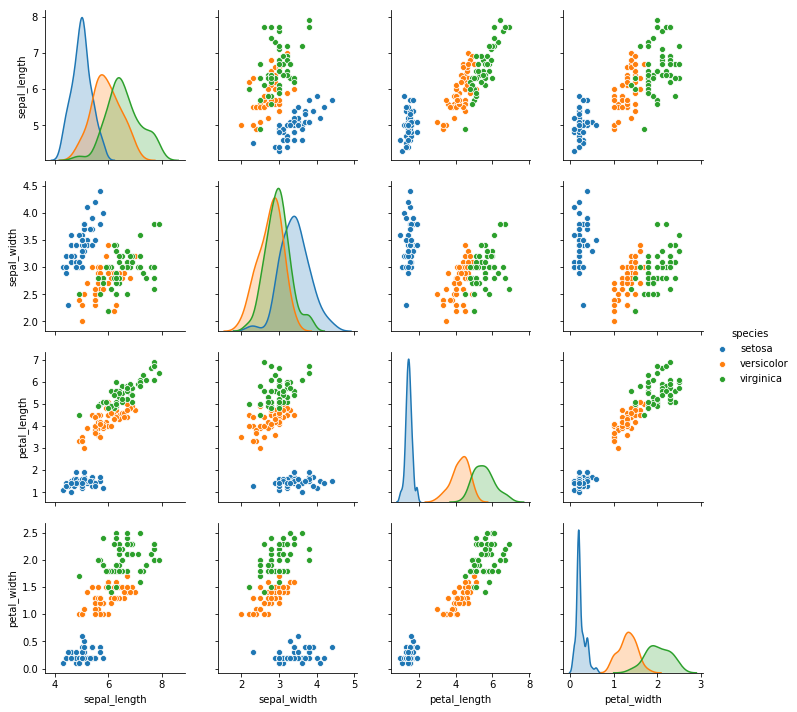

In [4]:
import seaborn as sns
sns.pairplot(df, hue="species")

In [5]:
x = df.drop('species', axis=1)
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
target_names = df['species'].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [10]:
y = df['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [0]:
from keras.utils.np_utils import to_categorical # same as dummy column

In [0]:
y_cat = to_categorical(y)

In [13]:
y_cat[:10]  # it has mutually exclucive classes

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y_cat, test_size=0.2)

In [0]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [0]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, epochs=20, validation_split=0.1)

Train on 108 samples, validate on 12 samples
Epoch 1/20
108/108 [==============================] - 0s 322us/step - loss: 0.2630 - acc: 0.9722 - val_loss: 0.3034 - val_acc: 0.9167
Epoch 2/20
108/108 [==============================] - 0s 226us/step - loss: 0.2550 - acc: 0.9630 - val_loss: 0.2948 - val_acc: 0.9167
Epoch 3/20
108/108 [==============================] - 0s 195us/step - loss: 0.2483 - acc: 0.9537 - val_loss: 0.2925 - val_acc: 0.9167
Epoch 4/20
108/108 [==============================] - 0s 158us/step - loss: 0.2455 - acc: 0.9630 - val_loss: 0.2813 - val_acc: 1.0000
Epoch 5/20
108/108 [==============================] - 0s 187us/step - loss: 0.2350 - acc: 0.9722 - val_loss: 0.2862 - val_acc: 0.9167
Epoch 6/20
108/108 [==============================] - 0s 194us/step - loss: 0.2412 - acc: 0.9444 - val_loss: 0.2706 - val_acc: 1.0000
Epoch 7/20
108/108 [==============================] - 0s 206us/step - loss: 0.2256 - acc: 0.9722 - val_loss: 0.2683 - val_acc: 0.9167
Epoch 8/20
108/10

In [0]:
y_pred = model.predict(x_test)

In [23]:
y_pred[:5] # probablity of 1st class , 2nd class, 3rd class

array([[8.3547337e-03, 8.0923599e-01, 1.8240927e-01],
       [9.8607838e-01, 1.3920323e-02, 1.3422805e-06],
       [6.5256864e-02, 8.6059785e-01, 7.4145257e-02],
       [9.7610688e-01, 2.3888718e-02, 4.4536191e-06],
       [5.6933789e-03, 7.4446476e-01, 2.4984190e-01]], dtype=float32)

<h2>Confusion Matrix

In [0]:
y_test_class = np.argmax(y_test, axis=1) # for each output row take tha max pridicted value
y_pred_class = np.argmax(y_pred, axis=1)

In [0]:
 from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      1.00      0.96        11
           2       1.00      0.86      0.92         7

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [0]:
from sklearn.metrics import confusion_matrix

In [28]:
confusion_matrix(y_test_class, y_pred_class) # confusion matrix

array([[12,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  6]])

In [29]:
result = model.evaluate(x_test, y_test)

30/30 [==============================] - 0s 362us/step


In [31]:
result      # categorical_crossentropy , accuracy score

[0.14337274432182312, 0.9666666388511658]